In [42]:
# import numpy as np

# def loadGloveModel(gloveFile):
#     print("Loading Glove Model")
#     f = open(gloveFile,'r', encoding='utf8')
#     model = {}
#     for line in f:
#         splitLine = line.split(' ')
#         word = splitLine[0]
#         embedding = np.asarray(splitLine[1:], dtype='float32')
#         model[word] = embedding
#     print("Done.",len(model)," words loaded!")
#     return model

# # Charger les vecteurs GloVe
# glove_file = './glove.840B.300d.txt'
# word_vectors = loadGloveModel(glove_file)

# # Obtenir le vecteur d'un mot spécifique
# word = 'chat'
# vector = word_vectors.get(word)

# # Afficher le vecteur
# #print(vector)

In [43]:
# # Obtenir le vecteur d'un mot spécifique
# word = 'feather'
# vector = word_vectors.get(word)

# # Afficher le vecteur
# print(vector)

In [19]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [16]:
print("Loading Glove Model")
f = open("glove.840B.300d.txt",'r', encoding='utf8')
embeddings_dict = {}
for line in f:
    splitLine = line.split(' ')
    word = splitLine[0]
    embedding = np.asarray(splitLine[1:], dtype='float32')
    embeddings_dict[word] = embedding
print("Done.",len(embeddings_dict)," words loaded!")

Loading Glove Model
Done. 2196017  words loaded!


In [17]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [18]:
embeddings_dict.get("dog")

array([-4.0176e-01,  3.7057e-01,  2.1281e-02, -3.4125e-01,  4.9538e-02,
        2.9440e-01, -1.7376e-01, -2.7982e-01,  6.7622e-02,  2.1693e+00,
       -6.2691e-01,  2.9106e-01, -6.7270e-01,  2.3319e-01, -3.4264e-01,
        1.8311e-01,  5.0226e-01,  1.0689e+00,  1.4698e-01, -4.5230e-01,
       -4.1827e-01, -1.5967e-01,  2.6748e-01, -4.8867e-01,  3.6462e-01,
       -4.3403e-02, -2.4474e-01, -4.1752e-01,  8.9088e-02, -2.5552e-01,
       -5.5695e-01,  1.2243e-01, -8.3526e-02,  5.5095e-01,  3.6410e-01,
        1.5361e-01,  5.5738e-01, -9.0702e-01, -4.9098e-02,  3.8580e-01,
        3.8000e-01,  1.4425e-01, -2.7221e-01, -3.7016e-01, -1.2904e-01,
       -1.5085e-01, -3.8076e-01,  4.9583e-02,  1.2755e-01, -8.2788e-02,
        1.4339e-01,  3.2537e-01,  2.7226e-01,  4.3632e-01, -3.1769e-01,
        7.9405e-01,  2.6529e-01,  1.0135e-01, -3.3279e-01,  4.3117e-01,
        1.6687e-01,  1.0729e-01,  8.9418e-02,  2.8635e-01,  4.0117e-01,
       -3.9222e-01,  4.5217e-01,  1.3521e-01, -2.8878e-01, -2.28

In [19]:
find_closest_embeddings(embeddings_dict["king"])

['king',
 'kings',
 'prince',
 'King',
 'queen',
 'throne',
 'kingdom',
 'lord',
 'reign',
 'royal',
 'monarch',
 'duke',
 'princes',
 'stead',
 'queens',
 'reigns',
 'emperor',
 'supreme',
 'lords',
 'Queen',
 'knight',
 'mighty',
 'reigned',
 'heaven',
 'swf/twc-widget-map',
 'beast',
 'sultan',
 'wise',
 'crown',
 'Prince',
 'heir',
 'brought',
 'princess',
 'god',
 'empire',
 'lion',
 'devil',
 'earl',
 'latter',
 'warrior',
 'uncle',
 'master',
 'palace',
 'brother',
 'one',
 'displayed_bid',
 'forbiddenwithoutreplacement',
 'overlord',
 'succeeded',
 'wicked',
 'know!OverviewReviews',
 'victor',
 'mad',
 'coronation',
 'fool',
 'cod_database_code',
 'taradoVP',
 'Ft.ARMLS',
 '370470570670770870971071171271371471571671771871972072172272372472572672772872973073173273373473573673773873974074174274374474574674774874975075175275375475575675775875976076176276376476576676776876977077177277377477577677777877978078178278378478578678778878979079179279379479579679779879980080180280380480580

In [21]:
find_closest_embeddings(embeddings_dict["dog"])[:5]

['dog', 'dogs', 'puppy', 'cat', 'pet']

In [41]:
print(find_closest_embeddings(
    embeddings_dict["king"] - embeddings_dict["man"] + embeddings_dict["woman"]
)[1:5])

['queen', 'prince', 'kings', 'princess']


In [25]:
tsne = TSNE(n_components=2, random_state=0)

In [31]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
vectors = np.array(vectors)

In [37]:
Y = tsne.fit_transform(vectors[:100])

C:\Users\Sasufox\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sasufox\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


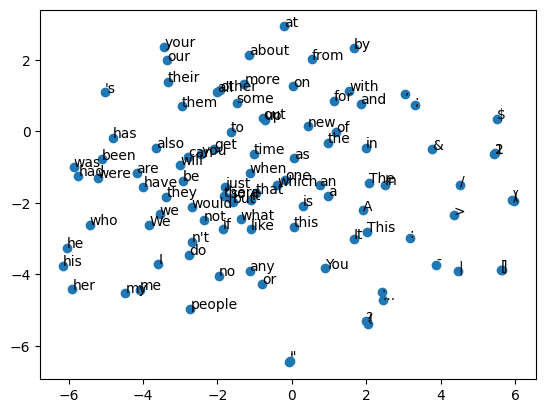

In [38]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [1]:
from transformers import BertModel, BertTokenizer

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

C:\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Sasufox\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
text = "I love dogs and cats because they are so cute and fluffy"
encoded_input = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)
input_ids = encoded_input['input_ids']
attention_mask = encoded_input['attention_mask']

In [42]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [43]:
outputs = model(input_ids, attention_mask=attention_mask)
encoded_layers = outputs.last_hidden_state

encoded_layers=encoded_layers.detach().numpy()

nsamples, nx, ny = encoded_layers.shape
encoded_layers = encoded_layers.reshape((nx, ny))
encoded_layers

array([[ 0.18160732,  0.18404809, -0.09146893, ..., -0.06064274,
         0.555274  ,  0.6014009 ],
       [ 0.77196795,  0.07788536, -0.55945975, ..., -0.0084057 ,
         0.7292119 ,  0.41394264],
       [ 1.0110568 ,  1.407339  ,  0.05850929, ...,  0.06070295,
         0.59133625,  0.38740754],
       ...,
       [ 0.07259033, -0.04752583,  0.34897235, ...,  0.2797087 ,
         0.30048057, -0.12131573],
       [ 0.11731833, -0.24570867,  0.21523055, ...,  0.4260747 ,
         0.2723379 , -0.3538422 ],
       [ 0.27457517, -0.03292318,  0.44774544, ...,  0.24786572,
         0.20244859, -0.15115564]], dtype=float32)

In [46]:
# Réduction de dimension avec t-SNE
import torch
tsne = TSNE(n_components=2, perplexity=2, random_state=0)
encoded_layers_tsne = tsne.fit_transform(encoded_layers)

C:\Users\Sasufox\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Sasufox\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


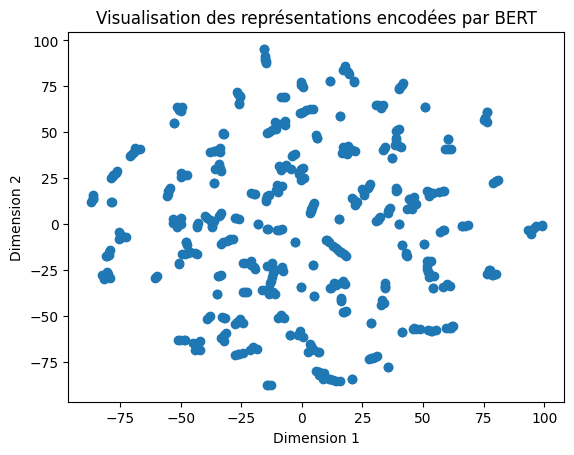

In [47]:
# Visualisation avec matplotlib
plt.scatter(encoded_layers_tsne[:, 0], encoded_layers_tsne[:, 1])
plt.title("Visualisation des représentations encodées par BERT")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [4]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
#import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [5]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [6]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [7]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102
